In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 50 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 40
symbols = ['^NYA', '^IXIC']
tickers = {'^NYA': 'nyse',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv'}

ITERS: 50





NYSE


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_4param.json
{   'params': {   'amounts': [   0.0025236745761106905,
                                 0.99,
                                 0.49708279184770854,
                                 -0.99],
                  'qs': [0.026953604322079272, -0.99, 0.99, 0.99]},
    'sd': 0.03259655499694899,
    'window': 20}
 1: Final value: $20147.17 (window = 20; sd = 0.033)
50: Final value: $12047.06 (window = 131; sd = 0.020)
% in now: 0.9917115738638664
Actions taken: 155
Wrote params to ../data/pct_params/nyse_3yr_4param.json


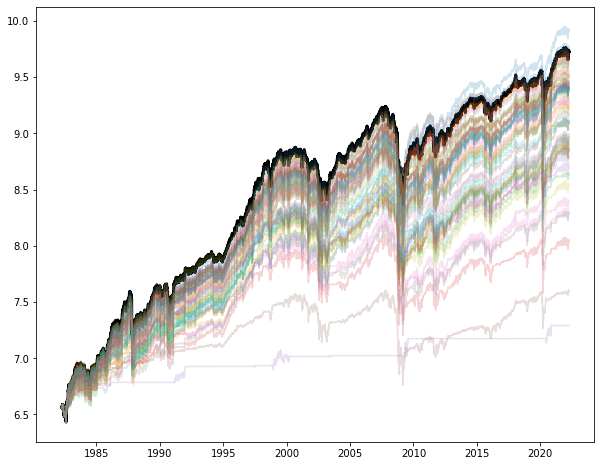

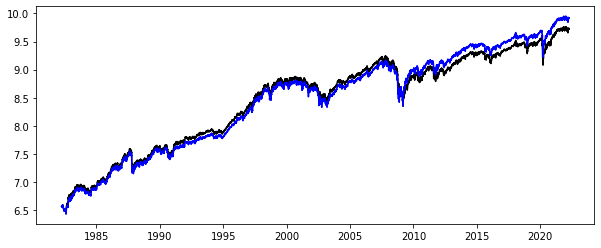

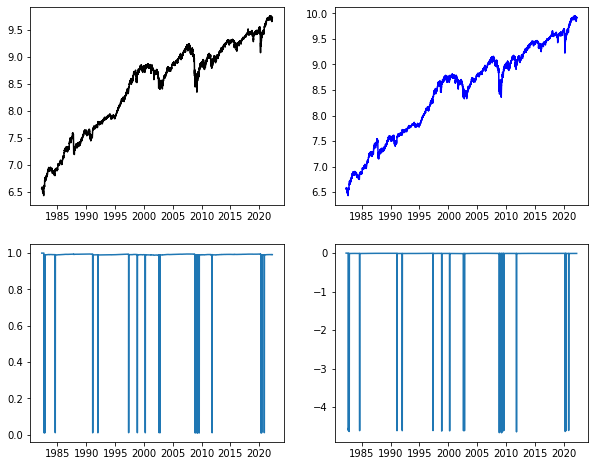



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_3param.json
{   'params': {   'amounts': [0.3945394430800168, -0.9118843752607284, 0.99],
                  'qs': [0.99, 0.99, -0.99]},
    'sd': 0.0676761709051406,
    'window': 20}
 1: Final value: $19863.05 (window = 20; sd = 0.068)
50: Final value: $ 3252.69 (window = 159; sd = 0.041)
% in now: 0.9923485181696049
Actions taken: 60
Wrote params to ../data/pct_params/nyse_3yr_3param.json


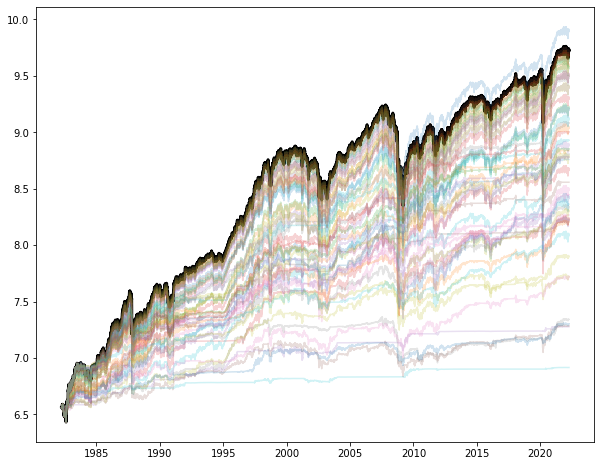

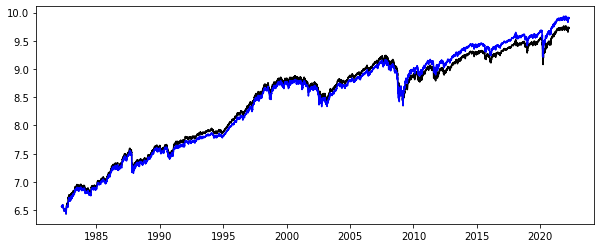

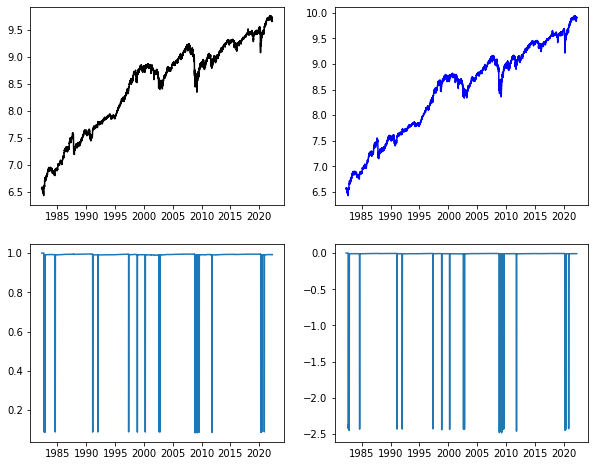



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nyse_3yr_2param.json
{   'params': {   'amounts': [0.903887332467809, -0.7176982025497144],
                  'qs': [-0.30610817538103824, 0.03094529772418389]},
    'sd': 0.09149132992206352,
    'window': 20}
 1: Final value: $15171.78 (window = 20; sd = 0.091)
 2: Final value: $16118.43 (window = 22; sd = 0.091)
New best model!
{   'amounts': [0.8134323149777618, -0.5311507592895219],
    'qs': [-0.6008968375004493, -0.020389524805299195]}
50: Final value: $ 2251.15 (window = 23; sd = 0.085))
% in now: 1.0
Actions taken: 642
Wrote params to ../data/pct_params/nyse_3yr_2param.json


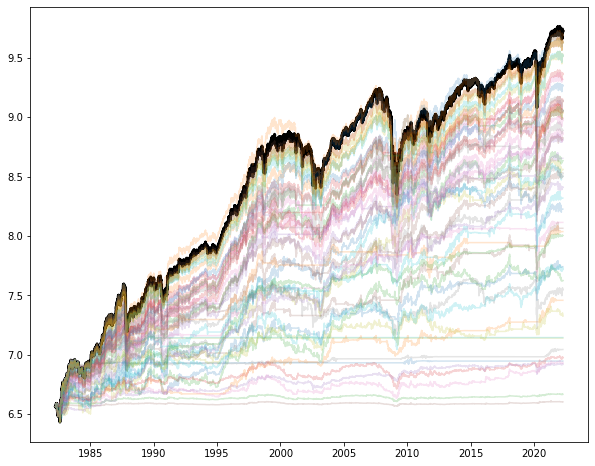

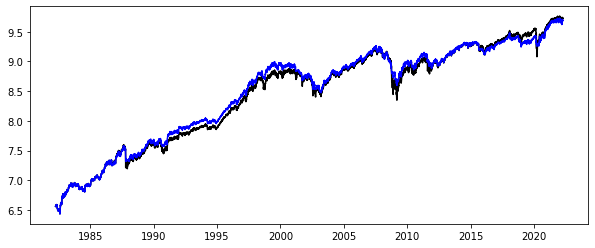

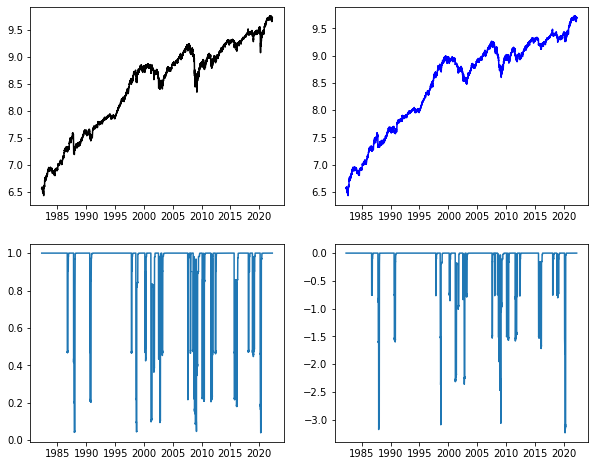




NASDAQ


--------------------------------------------------
Beginning 4-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_4param.json
{   'params': {   'amounts': [   0.99,
                                 -0.10030061583944816,
                                 -0.99,
                                 0.014751417282225843],
                  'qs': [   0.27693570918460525,
                            -0.99,
                            0.08793159391773603,
                            -0.6321762272674555]},
    'sd': 0.4480060110273262,
    'window': 365}
 1: Final value: $14424.82 (window = 365; sd = 0.448)
50: Final value: $  603.99 (window = 892; sd = 0.274))
% in now: 0.9999999999446569
Actions taken: 282
Wrote params to ../data/pct_params/nasdaq_3yr_4param.json


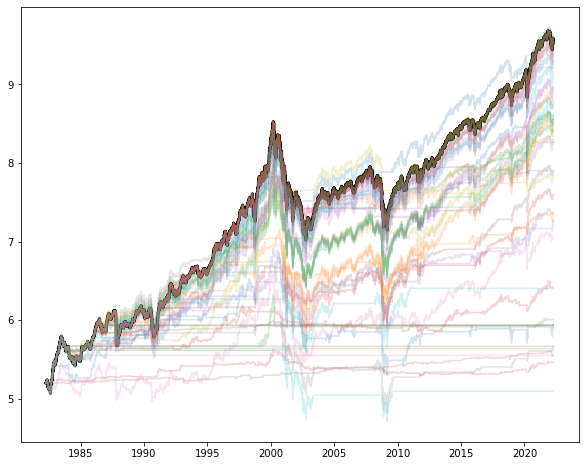

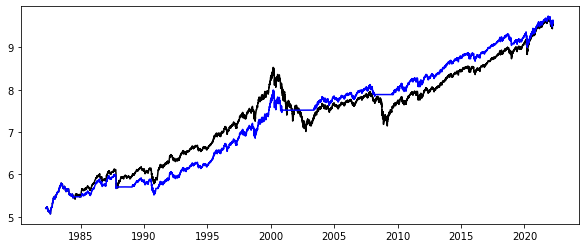

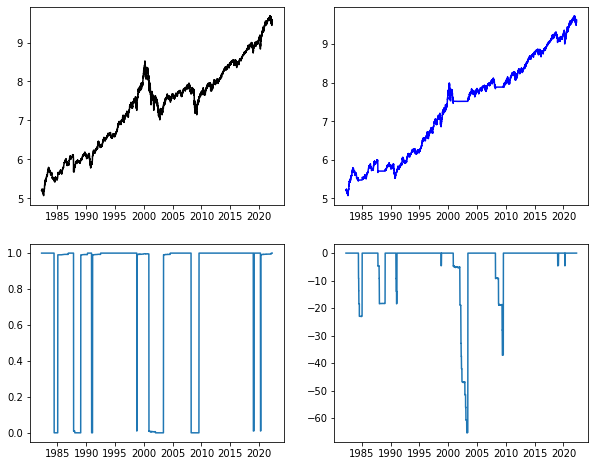



--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_3param.json
{   'params': {   'amounts': [   0.18184070693261703,
                                 -0.0961782173202748,
                                 -0.9633228592082537],
                  'qs': [0.7651315906687699, -0.99, 0.99]},
    'sd': 0.12533016964607835,
    'window': 98}
 1: Final value: $26308.09 (window = 98; sd = 0.125)
50: Final value: $  956.82 (window = 548; sd = 0.077)
% in now: 0.9999999999268847
Actions taken: 178
Wrote params to ../data/pct_params/nasdaq_3yr_3param.json


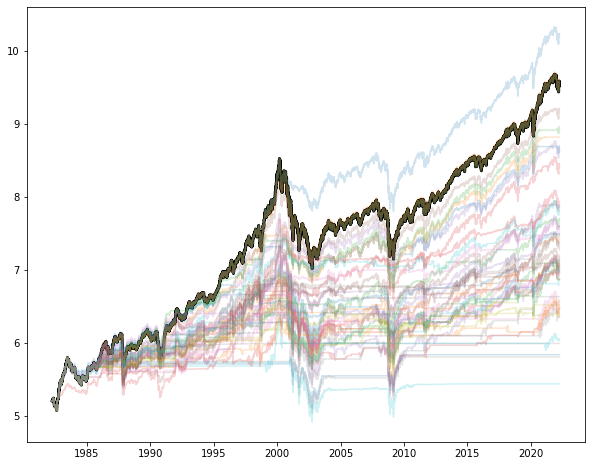

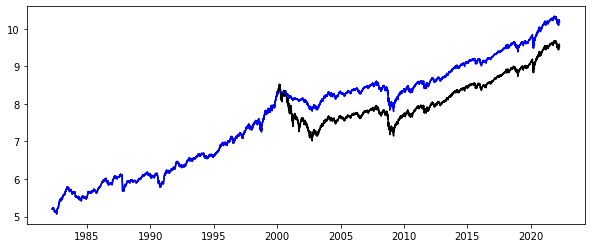

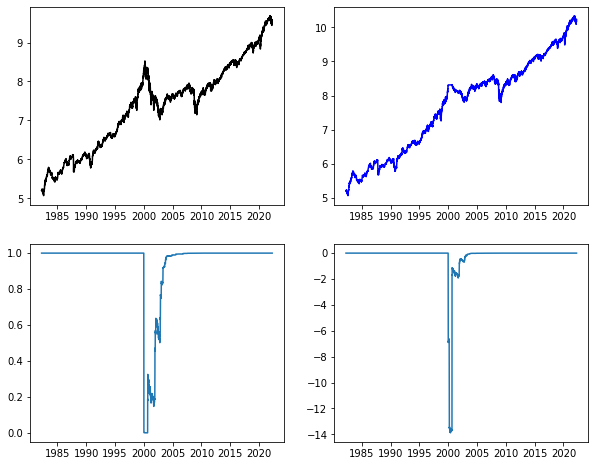



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1982-04-08
Successfully loaded params from ../data/pct_params/nasdaq_3yr_2param.json
{   'params': {   'amounts': [0.99, -0.99],
                  'qs': [0.394619215614919, -0.15180639969555876]},
    'sd': 0.6713950418679229,
    'window': 20}
 1: Final value: $14116.77 (window = 20; sd = 0.671)
50: Final value: $13711.00 (window = 651; sd = 0.410))
% in now: 0.990252993499402
Actions taken: 835
Wrote params to ../data/pct_params/nasdaq_3yr_2param.json


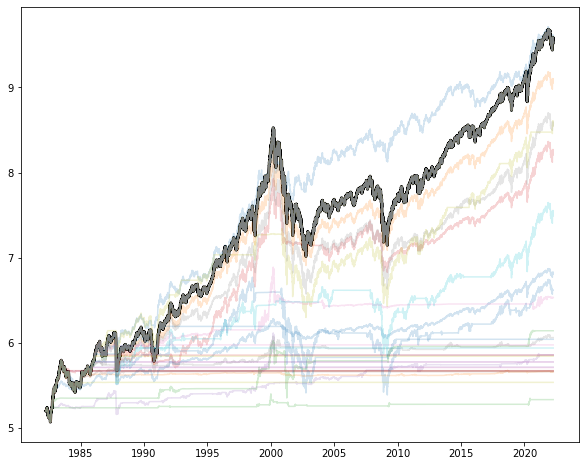

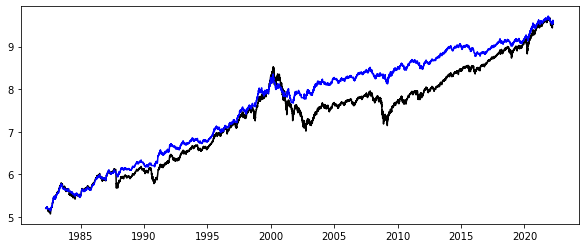

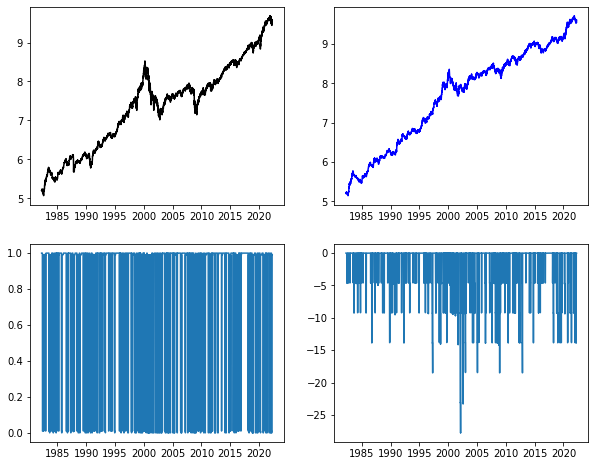

In [6]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = {'pct_in': [], 'multiplier': []}
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [4, 3, 2]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_3yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker]['pct_in'].append(plot_results(best_data))
        mod_returns = (
            best_data.Total.tolist()[-1] / best_data.Total.tolist()[1])
        market_returns = (
            best_data.Value.tolist()[-1] / best_data.Value.tolist()[1])
        multiplier = mod_returns / market_returns
        percent_in[ticker]['multiplier'].append(multiplier)
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()

In [7]:
for idx, data in percent_in.items():
    for i, pct in enumerate(data['multiplier']):
        if pct <= 1:
            data['pct_in'][i] = 1
            data['multiplier'][i] = 0
for idx, data in percent_in.items():
    print(idx)
    for k, v in data.items():
        print(f'  {k:10s}:', end=' ')
        for amt in v:
            print(f'{amt:.4f}', end=' ')
        print()
    print()

nyse
  pct_in    : 0.9917 0.9923 1.0000 
  multiplier: 1.2071 1.1901 0.0000 

nasdaq
  pct_in    : 1.0000 1.0000 0.9903 
  multiplier: 1.0521 1.9188 1.0296 



In [8]:
!say 40 year done